# Text Generation with LSTM Recurrent Neural Nerworks

In this project, a sample text file is used as an input for which a machine will be trained. Based on the training, machine will automatically execute its own generated words. The entire code is written in Python. Jupyter notebook is used as the interface to write the project.
In order to move further with the coding part, first we need to learn more about Recurrent Neural Networks(RNNs).

## Recurrent Neural Networks (RNN)

Recurrent Neural Networks (RNNs) are popular models that are greatly used in many Natural Language Processing (NLP) tasks. A recurrent neural network (RNN) is a part of artificial neural network (ANN) where connections between units form a directed graph along a sequence. This allows it to exhibit dynamic temporal behavior for a time sequence. RNNs use their internal state to process the sequence of inputs. This is not possible in feedforward neural networks.

### What are RNNs exactly?

RNNs are neural networks which repeatedly make use of sequential information.The main assumption in a traditional artificial neural network is that all inputs and outputs are independent of each other and are not in sequence. But if we look at it, it is not such a great way to approach ANNs. Imagine a scenario where you have to predict the next song a user might want to listen. This will be impossible if the model won't know what songs have already been played. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being dependent on the previous computations. Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far. RNNs are supposed to make use of information in very long sequences but in reality, they can look back at only few steps. Here is what a typical RNN looks like:

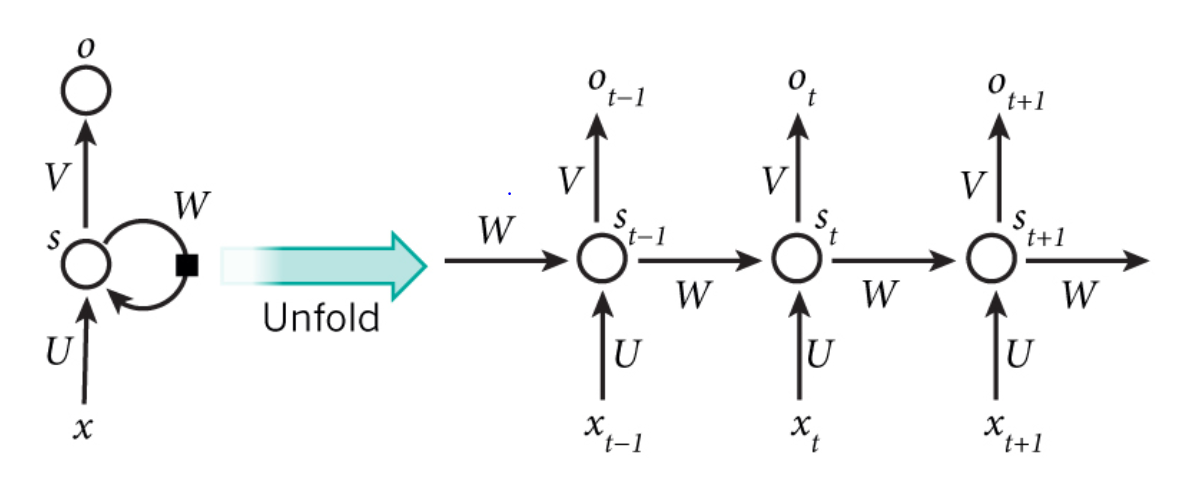

### What can RNNs do?

1. Language Modelling
2. Image captioning
3. Answering the questions
4. Video to text conversion
5. Image generation
6. Sequence to sequence learning
7. Speech recognition
8. Text generation

### What RNNs cannot do?

1. RNNs have very high complexity as they are recurring. Meaning the keep on executing & training the model with the training results itself.
2. RNNs are not stable. RNNs reinforce the feedback cycles on their own because in recurrent networks, the outputs are the inputs!
3. There is a lot of noise generation
4. They do not have terminal layer. They can keep training the data forever if they  wish.
5. They cannot memorize large amount of data

To tackle the problem of memorizing large amounts of data, we use LSTM.
LSTM are Long Short Term Memory networks.

### Long Short Term Memory (LSTM)

LSTM are special kind of Recurrent Neural Networks which are specifically designed to handle long term dependencies. They remember information for longer periods of time by default. It is not something they have to explicitly learn or train for. LSTM, like all RNNs have a chain like structure of repeating modules of neural network. LSTM has a different chain like structure as compared to traditional RNN. They have four neural network layers instead of one.

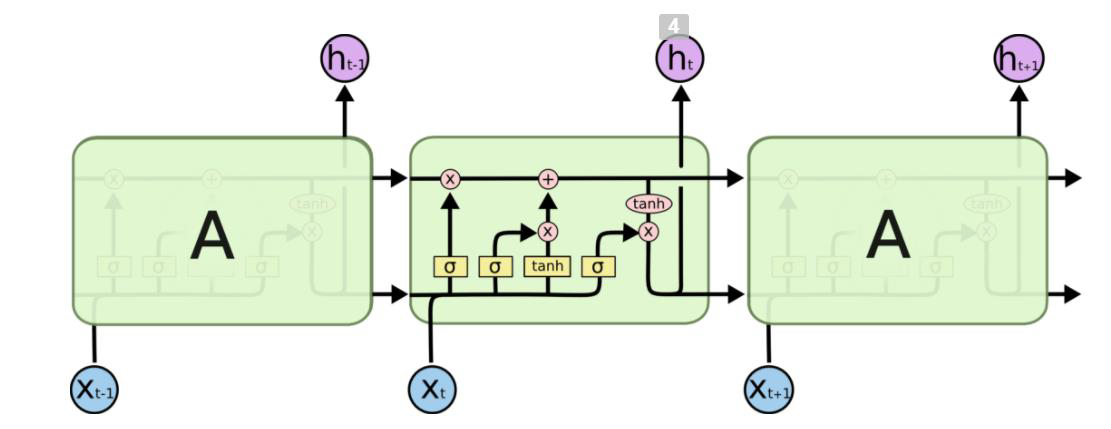

To further demonstrate how LSTM actually works, we will perform text generation with a book as an input.

In this project, we are trying to generate the next text that the machine will predict according to the inputs we provide.
We are using Artificial neural networks instead of staistical models as we try to guess a human's behavior. The complexity of training an ANN is higher as compared to statistical models.

To make the code as relative as possible, we have taken the following steps:
    1. We install keras and tensorflow as it is not installed by default in Anaconda
    2. Keep the filepaths relative & not absolute to the system
    3. Attached the training file along the code in the package
    4. Importing files and using aliases used globally to avoid confusion

In [1]:
#importing necessary packages including keras and tensorflow which needs to be installed
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from __future__ import print_function

Using TensorFlow backend.


We import the book which is in .txt format. We need to specify the encoding as it is required to make the file compatible in Python 3.X .Then we convert the .txt to all lower case. Converting to lower case will reduce the number of words the model will have to learn. We further plan to use the .txt file as it is to train the model with better accuracy.

In [2]:
# load ascii text and covert to lowercase
filename = "wonderland.txt"
raw_text = open(filename,encoding="utf8").read() # Need to specify the encoding in python 3+
raw_text = raw_text.lower()

In neural networks, it is easier to train integers as compared to characters. Hence, we convert the character values of the book to integers. First we create a set of all distict characters and then we map unique characters to unique integers.

In [3]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

We find the number of characters & the number of unique characters in the book. We find that there are around 163K characters and 61 unique characters.

In [4]:
# Now that the book has been loaded and the mapping prepared, we can summarize the dataset
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  163817
Total Vocab:  61


We then divide the book in characters of length 100. In this way, the model will learn the next character after the 100 characters at a time and find out different patterns in the book. The more number of patterns that are discovered, better is the training set and will yield better results.

For example, consider sequence length of 5 and word 'amazon'. It will first read 'amazo' and read 'n' after that.
Consider a word greater than length 6. For example, 'wonderland'
The reading for this word will be as follows:
    1. 'wonde' & 'r'
    2. 'onder' & 'l'
    3. 'nderl' & 'a'
    ... and so on.

In [5]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    n_patterns = len(dataX)
print("Total Patterns: ", n_patterns) # Don't indent!!! 

Total Patterns:  163717


Now that we have prepared our training data we need to transform it so that it is suitable for use with Keras.

First we must transform the list of input sequences into the form expected by an LSTM network.

Next we need to rescale the integers to the range 0-to-1 to make the patterns easier to learn by the LSTM network that uses the sigmoid activation function by default.

In [6]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))



In [7]:
# normalize
X = X / float(n_vocab)

In [8]:
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

LSTM is a modification of Recurrent Neural Network. Its performance is better than RNN because RNN is not capable of memorizing large amount of data. LSTM includes memory cell which can help maintain information in memory for longer amount of time.

In [9]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

There is no test dataset. We are modeling the entire training dataset to learn the probability of each character in a sequence.

The network is slow to train. Because of the slowness and because of our optimization requirements, we will use model checkpointing to record all of the network weights to file each time an improvement in loss is observed at the end of the epoch(one forward pass and one backward pass of all the training examples).

In [10]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [11]:
model.fit(X, y, epochs=50, batch_size=128, callbacks=callbacks_list) 
#This takes a lot of time(5 minutes per epoch due to batch size of 512 patterns).
#For better test results/future scope, we can increase the size of epoch with reduced batch size.

Epoch 1/50
163717/163717 [==============================] - 1101s 7ms/step - loss: 3.0122

Epoch 00001: loss improved from inf to 3.01216, saving model to weights-improvement-01-3.0122.hdf5
Epoch 2/50
163717/163717 [==============================] - 1121s 7ms/step - loss: 2.8376

Epoch 00002: loss improved from 3.01216 to 2.83761, saving model to weights-improvement-02-2.8376.hdf5
Epoch 3/50
163717/163717 [==============================] - 1098s 7ms/step - loss: 2.7549

Epoch 00003: loss improved from 2.83761 to 2.75489, saving model to weights-improvement-03-2.7549.hdf5
Epoch 4/50
163717/163717 [==============================] - 1068s 7ms/step - loss: 2.6889

Epoch 00004: loss improved from 2.75489 to 2.68886, saving model to weights-improvement-04-2.6889.hdf5
Epoch 5/50
163717/163717 [==============================] - 658s 4ms/step - loss: 2.6355

Epoch 00005: loss improved from 2.68886 to 2.63550, saving model to weights-improvement-05-2.6355.hdf5
Epoch 6/50
163717/163717 [=========

163717/163717 [==============================] - 605s 4ms/step - loss: 1.8178

Epoch 00045: loss improved from 1.81823 to 1.81778, saving model to weights-improvement-45-1.8178.hdf5
Epoch 46/50
163717/163717 [==============================] - 625s 4ms/step - loss: 1.8171

Epoch 00046: loss improved from 1.81778 to 1.81712, saving model to weights-improvement-46-1.8171.hdf5
Epoch 47/50
163717/163717 [==============================] - 636s 4ms/step - loss: 1.8089

Epoch 00047: loss improved from 1.81712 to 1.80894, saving model to weights-improvement-47-1.8089.hdf5
Epoch 48/50
163717/163717 [==============================] - 639s 4ms/step - loss: 2.1773

Epoch 00048: loss did not improve
Epoch 49/50
163717/163717 [==============================] - 656s 4ms/step - loss: 2.1168

Epoch 00049: loss did not improve
Epoch 50/50
163717/163717 [==============================] - 663s 4ms/step - loss: 1.9326

Epoch 00050: loss did not improve


In [12]:
# load the network weights
filename = "weights-improvement-47-1.8089.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [13]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [14]:
# pick a random seed
import sys
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

Seed:
" ck turtle’s
heavy sobs.

lastly, she pictured to herself how this same little sister of hers
would,  "


In [15]:

# generate characters
for i in range(1000):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index) # To append a single remaining index value
    pattern = pattern[1:len(pattern)] # To remove an extra index value
print("\nDone.") 

and the whrt on thet wise she wes oo the thet had bed an a leeuter wote. and the was nor in anliher wored in a little worde. and she taid to herself ‘iht sae a citters tas a aonser tf that io the sabe. and the west on tuiee to an and then at the codless, and she was norking the thiet oaed th the was to gend her haad. 
‘he io wonh th the wout!’ she kact rhidpedd in a tory of tiice of the gormh. 
‘ht is sie suree ihtee bn a les lis wo teye you mo youh tees the sea--’

‘what woul toeete,’ said the match hare.

‘ih toete thee io the wes,’ said alice, ‘io would be a very oo tuee an all an it eane  and i saad io so teet to teee ’o

al cel toe white sited the dooreuse the dad not thee to tee otoersins oo the that was a lott of linel to bn the wint wire an in hade an herse fer and taed to the thett whine whs dad boen the shing then soeetien, and the woide the was not in a lintte or two she was notking an it was tore tie was thet hard sas she winle rai her hand and a lroked oo the tioed the was

### Further Scope

1. Train the model more by increasing the epochs & decreasing the batch size
2. Try different RNN and compare which is better
3. Try to train the data with more than 1 sources
4. Predict less characters for output

### Licenses

This project is licensed under MIT which is available on the GitHub site which we created: 
https://github.com/luvesht/Machine-Learning/blob/master/LICENSE

Also, we have referred Trung Tran's work and following is his license.
https://github.com/ChunML/text-generator/blob/master/LICENSE

### References

1. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
2. https://www.datacamp.com/community/tutorials/deep-learning-python
3. https://github.com/tensorflow/models
4. https://chunml.github.io/ChunML.github.io/project/Creating-Text-Generator-Using-Recurrent-Neural-Network/
5. https://en.wikipedia.org/wiki/Long_short-term_memory
6. https://deeplearning4j.org/lstm.html